In [1]:
# # IMPORTS
# astronomy
from astropy.io import fits
# plotting 
from matplotlib.ticker import AutoMinorLocator
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
# data 
import numpy as np
# my python files 
import match
import v2_AGN_DataAndPlotting as adp
import v2_SED as SED

# Data

In [2]:
# read file 
dataNew = adp.UnpackTable(adp.path_csv+'\\Lx_correction_plot_data_update.csv')
print(dataNew.keys())

# fix types
dataNew['ID'] = np.array(dataNew['ID'], dtype=int)
dataNew['Lx_corr'] = np.array(dataNew['Lx_corr'], dtype=float)

dict_keys(['ID', 'Lx_corr', 'group'])


In [3]:
def SplitByColor(dataNew: dict) -> dict : 
    agnInfo = {}
    for color in ['RED', 'GRN', 'BLU'] : 
        idx = np.where(dataNew['group'] == color)
        agnInfo[color] = {
            'ID'        : dataNew['ID']     [idx], 
            'Lx_corr'   : np.log10(dataNew['Lx_corr'][idx]),
        }
    return agnInfo

agnInfo = SplitByColor(dataNew)

# Plot

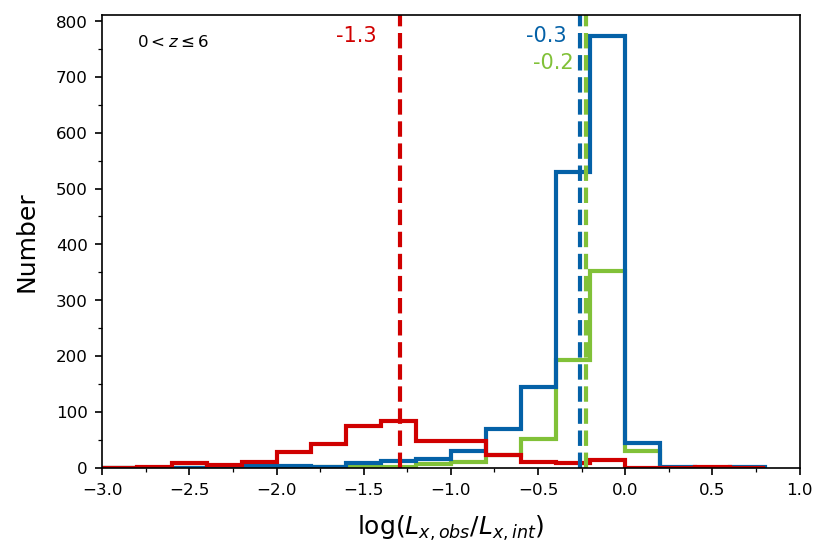

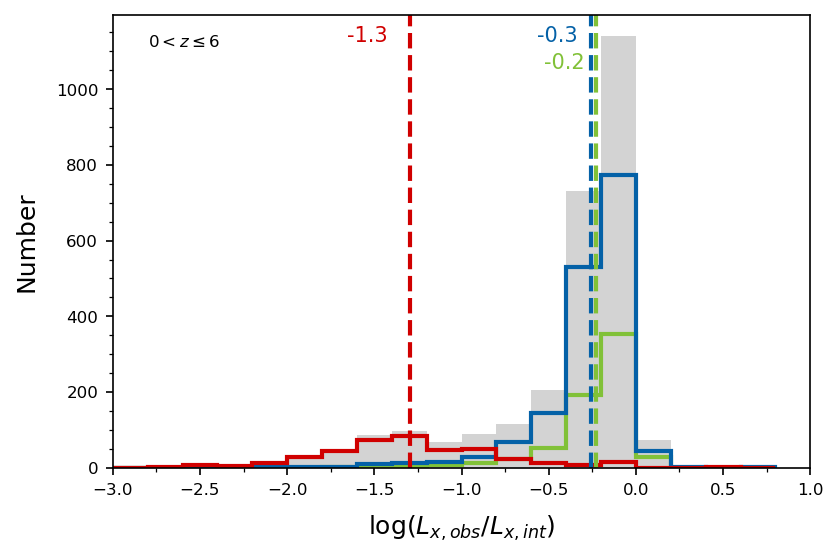

In [10]:
def MakePlot(
    x_red : np.array ,
    x_grn : np.array ,
    x_blu : np.array ,
    bins  : np.array = np.arange(-3,1,0.2),
    save  : str = '',
    sumAll: bool = False 
) : 
    # setup plot
    adp.SetStyle()
    # plot data
    if(sumAll) :
        plt.hist(np.concatenate((x_red,x_grn,x_blu)), bins=bins, histtype='bar', color='lightgray',      linewidth=2)
    plt.hist(x_grn, bins=bins, histtype='step', color=adp.c_ir_xray,   linewidth=2)
    plt.hist(x_blu, bins=bins, histtype='step', color=adp.c_xray,      linewidth=2)
    plt.hist(x_red, bins=bins, histtype='step', color=adp.c_ir,        linewidth=2)
    adp.MeanLineForHist(x=x_red,c=adp.c_ir,     xtext=1.1,ytext=0.94,horizAlign='right',pre='')
    adp.MeanLineForHist(x=x_grn,c=adp.c_ir_xray,xtext=1.3,ytext=0.88,horizAlign='right',pre='')
    adp.MeanLineForHist(x=x_blu,c=adp.c_xray,   xtext=1.3,ytext=0.94,horizAlign='right',pre='')
    # format
    plt.xlim(-3,1)
    plt.xlabel('$\log ( L_{x,obs}/L_{x,int} )$')
    plt.ylabel('Number')
    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    if(sumAll) : 
        ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    else : 
        ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    adp.AddText_z_ax(ax,'$0 < z \\leq 6$')
    # finish
    if(save != '') : adp.Save(save)
    plt.show()
    plt.close()

MakePlot(
    x_red = agnInfo['RED']['Lx_corr'],
    x_grn = agnInfo['GRN']['Lx_corr'],
    x_blu = agnInfo['BLU']['Lx_corr'],
    save  = adp.path_fig + '\\v2_hist_Lxobsint.png'
)

MakePlot(
    x_red = agnInfo['RED']['Lx_corr'],
    x_grn = agnInfo['GRN']['Lx_corr'],
    x_blu = agnInfo['BLU']['Lx_corr'],
    save  = adp.path_fig + '\\v2_hist_Lxobsint_gray.png',
    sumAll= True
)